# Predicting Loan Status using machine learning models

I am going to take the following approach :
1. Define the problem
2. ETL and Data preprocessing 
3. Modelling
4. Evaluation
5. Saving the model

## 1. Defining the Problem
In a statement,
> Given the  parameters about a loanee, can we predict whether or not they got a approved for a loan?

## 2. Data 
The original dataset came from Kaggle.com. Follow the link for futher details:https:https://www.kaggle.com/datasets/ninzaami/loan-predication

## 3.Evaluation

> If we can reach 80% accuarcy for predicting weather a person is loanee or not.

## 4. Feartures
* Loan_ID
* Gender
* Married
* Dependents
* Education
* Self_Employed
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* Loan_Amount_Term
* Credit_History
* Property_Area
* Loan_Status

#### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

#### Data Collection and preprocessing


In [2]:
# loading Dataset into pandas DF
loan_df = pd.read_csv("C:/Users/alwee/OneDrive/Desktop/Loan status predict/loan_ST.csv")
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
loan_df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [6]:
columns_to_fill = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
loan_df[columns_to_fill] = loan_df[columns_to_fill].fillna(loan_df[columns_to_fill].mean())

loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan_df = loan_df.dropna()

In [8]:
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
loan_df.shape

(554, 13)

In [10]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


#### Label Encoding

In [11]:
loan_df.replace({"Loan_Status":{"N":0,"Y":1}},inplace = True)

C:\Users\alwee\AppData\Local\Temp\ipykernel_13804\1426432754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df.replace({"Loan_Status":{"N":0,"Y":1}},inplace = True)


In [12]:
loan_df = loan_df.replace(to_replace ="3+", value =4)

In [13]:
loan_df["Dependents"].value_counts()

0    319
1     95
2     94
4     46
Name: Dependents, dtype: int64

In [14]:
loan_df["Married"] =  loan_df["Married"].map({'No': 0, 'Yes': 1})

In [15]:
loan_df["Education"] = loan_df["Education"].map({'Not Graduate': 0, 'Graduate': 1})

In [16]:
loan_df["Self_Employed"] = loan_df["Self_Employed"].map({'No': 0, 'Yes': 1})

In [17]:
loan_df["Gender"] = loan_df["Gender"].map({'Female': 0, 'Male': 1})

In [18]:
loan_df["Property_Area"].value_counts()

Semiurban    211
Urban        180
Rural        163
Name: Property_Area, dtype: int64

In [19]:
one_hot_encoded_df = pd.get_dummies(loan_df['Property_Area'], prefix='Property_Area')
loan_df = pd.concat([loan_df, one_hot_encoded_df], axis=1)
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1,0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1,0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1,0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1,0,0,1


### Exploratory Data Analysis

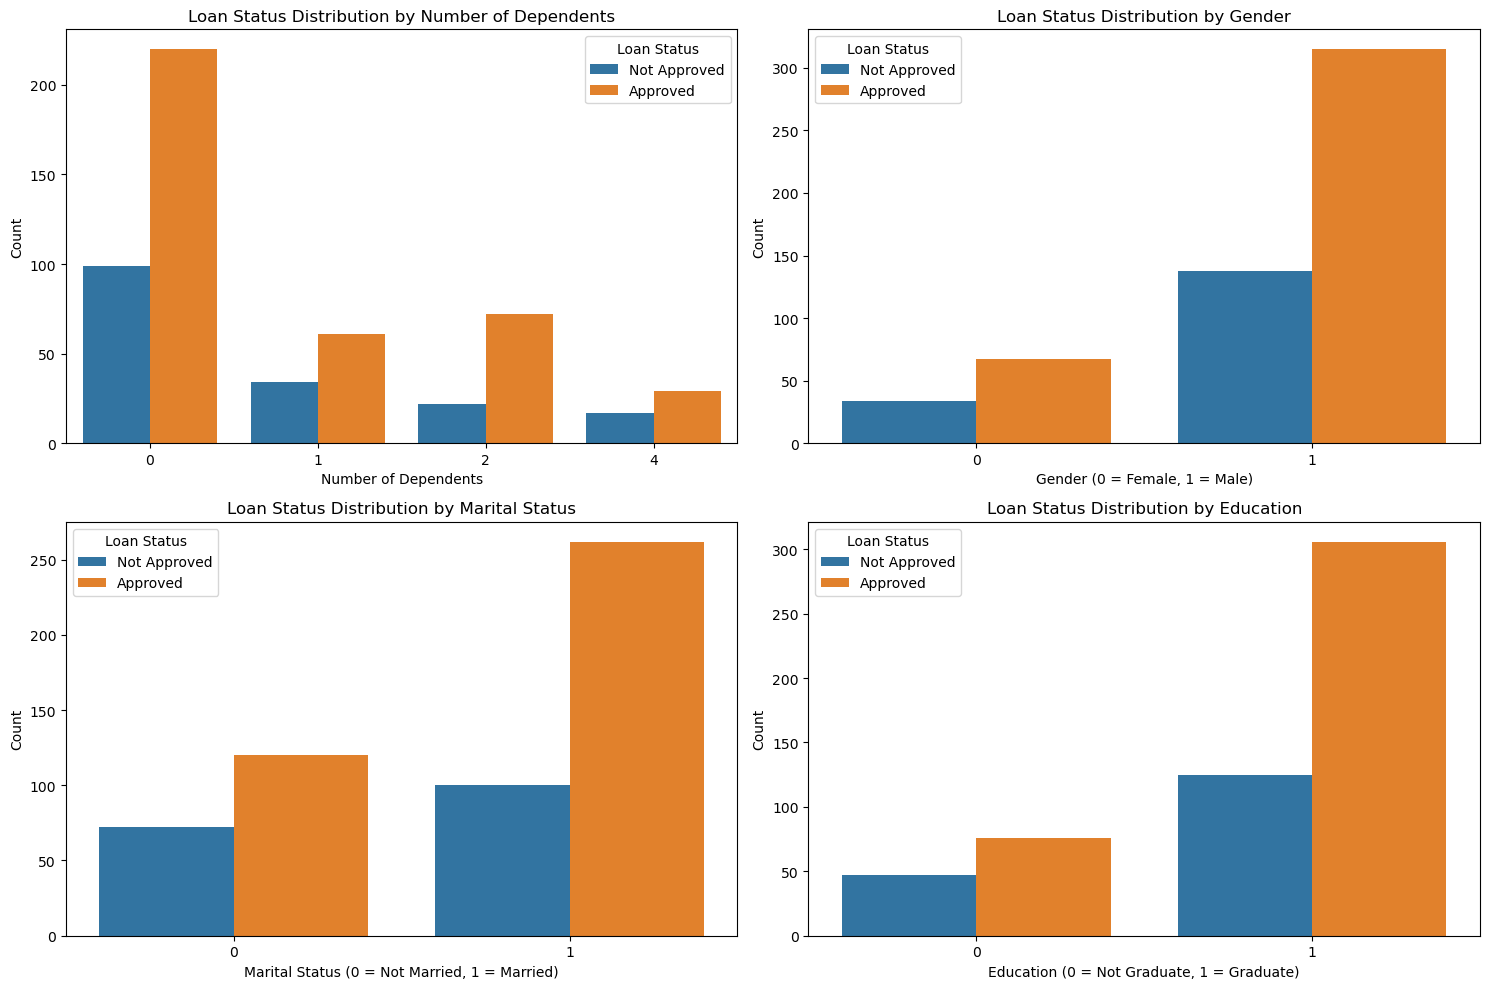

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(ax=axes[0, 0], x="Dependents", hue="Loan_Status", data=loan_df)
axes[0, 0].set_title("Loan Status Distribution by Number of Dependents")
axes[0, 0].set_xlabel("Number of Dependents")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend(title="Loan Status", labels=["Not Approved", "Approved"])

sns.countplot(ax=axes[0, 1], x="Gender", hue="Loan_Status", data=loan_df)
axes[0, 1].set_title("Loan Status Distribution by Gender")
axes[0, 1].set_xlabel("Gender (0 = Female, 1 = Male)")
axes[0, 1].set_ylabel("Count")
axes[0, 1].legend(title="Loan Status", labels=["Not Approved", "Approved"])

sns.countplot(ax=axes[1, 0], x="Married", hue="Loan_Status", data=loan_df)
axes[1, 0].set_title("Loan Status Distribution by Marital Status")
axes[1, 0].set_xlabel("Marital Status (0 = Not Married, 1 = Married)")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend(title="Loan Status", labels=["Not Approved", "Approved"])

sns.countplot(ax=axes[1, 1], x="Education", hue="Loan_Status", data=loan_df)
axes[1, 1].set_title("Loan Status Distribution by Education")
axes[1, 1].set_xlabel("Education (0 = Not Graduate, 1 = Graduate)")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(title="Loan Status", labels=["Not Approved", "Approved"])

plt.tight_layout()
plt.show()


C:\Users\alwee\AppData\Local\Temp\ipykernel_13804\913088103.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_df.corr()


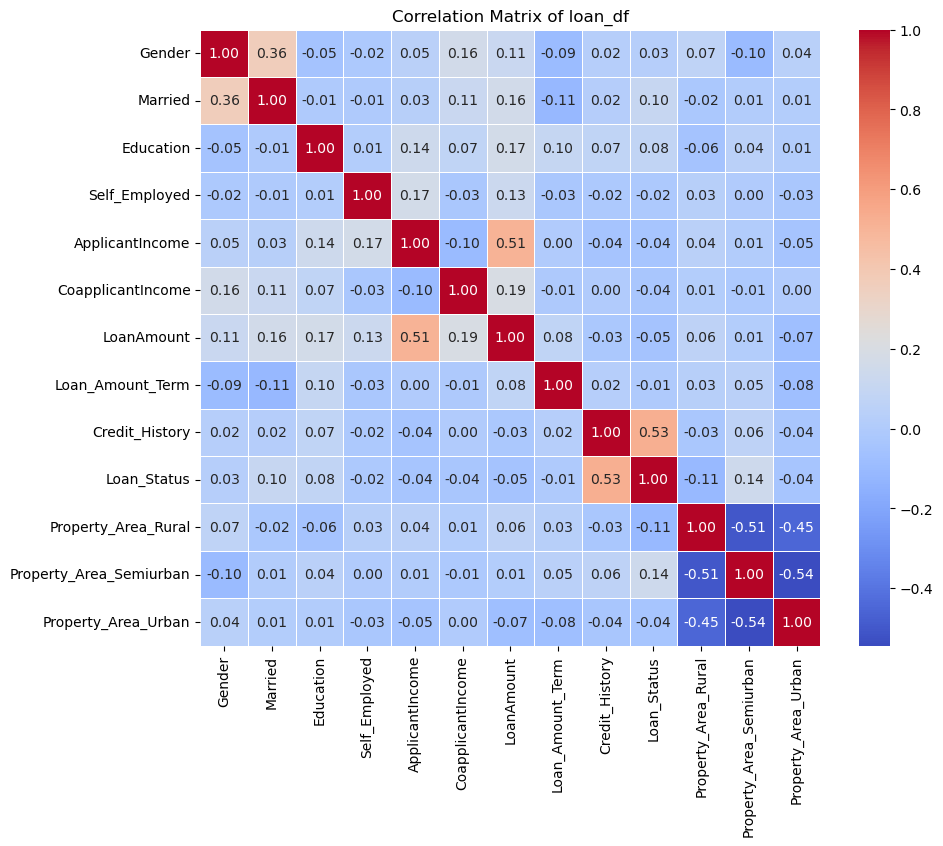

In [21]:
correlation_matrix = loan_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of loan_df")
plt.show()

### Splitting the Data

In [22]:
X = loan_df.drop(columns =["Loan_Status","Loan_ID","Property_Area"])
y = loan_df["Loan_Status"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,stratify=y,random_state =2)

### Training the Data
* Support Vector Machine Learning Model

In [23]:
model = svm.SVC(kernel = "linear")
model.fit(X_train, y_train)

SVC(kernel='linear')

### Model evaluation

In [24]:
# Accuracy of training data
X_train_pred = model.predict(X_train)
train_acc =accuracy_score(X_train_pred,y_train)
print("Accuracy Score for training data:" ,train_acc*100)

Accuracy Score for training data: 79.68397291196389


In [25]:
# Accuracy of test data
y_pred = model.predict(X_test)
test_acc =accuracy_score(y_pred,y_test)
print("Accuracy Score for testing data:" ,test_acc*100)

Accuracy Score for testing data: 80.18018018018019


In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score

# Assuming model and X_test, y_test are defined
y_pred = model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))







Confusion Matrix:
[[16 18]
 [ 4 73]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.47      0.59        34
           1       0.80      0.95      0.87        77

    accuracy                           0.80       111
   macro avg       0.80      0.71      0.73       111
weighted avg       0.80      0.80      0.78       111



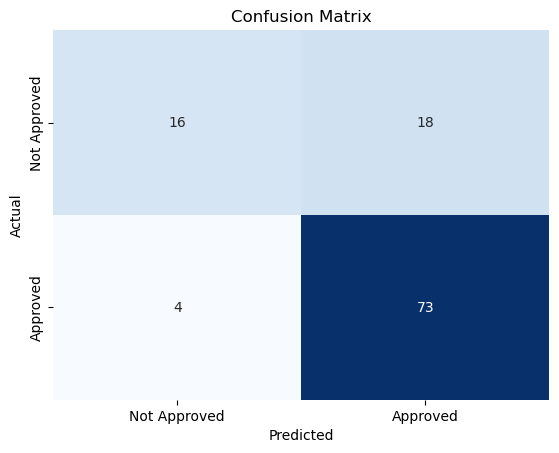

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Saving the Model

In [30]:
import joblib
import pickle
joblib.dump(model," Loan_status_prediction.joblib")
pickle.dump(model,open( "Loan_status_prediction.sav", "wb"))

In [31]:
# loading the model
loaded_model = pickle.load(open("Loan_status_prediction.sav", "rb"))
